In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
#import datetime as dt
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#Find last date of measurements in dataset. Returns a string
last_measurement=session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(last_measurement)

2017-08-23


In [11]:
#Convert string to a datetime object
last_date=datetime.strptime(last_measurement, '%Y-%m-%d').date()
type(last_date)

datetime.date

In [12]:
#Find the date one year prior to the last date of measurement
first_date = last_date - dt.timedelta(days=365)
print(first_date)

2016-08-23


In [31]:
#Grab last year of measurement results
results= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > first_date).all()

In [65]:
#Put results into a dataframe, set index to date, and sort by date
df=pd.DataFrame(results, columns=['date','prcp'])
df['date']=pd.to_datetime(df['date'])
df=df.set_index('date')
df=df.sort_index()
df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


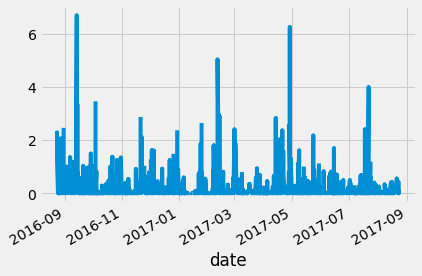

In [76]:
#Visualize 
df['prcp'].plot(kind='line')
plt.show()

In [66]:
#After doing this next part, I realized it probably isn't very revlevent to combine by day. 

#Return new df with sum of the prcp columns, grouped by date index
total_by_day_df= df.groupby([pd.Grouper(freq="D")]).sum()
total_by_day_df.head()

,prcp
date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10


In [67]:
len(total_by_day_df)

365

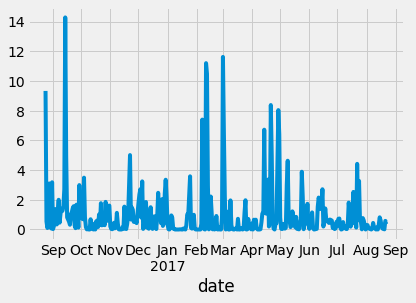

In [75]:
total_by_day_df['prcp'].plot(kind='line')
plt.show()

In [78]:
# Summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [96]:
# A query to show how many stations are available in this dataset

total_stations=session.query(Station.station).count()
print(total_stations)

9


In [205]:
# The number of observations by station, in desending order

stations=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [206]:
# The lowest, highest, and average temperature of the most active station:
most_active=stations[0][0]
observations=session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station==most_active).all()
observations

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [207]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data and plot
results=session.query(Measurement.tobs).filter(Measurement.station==most_active).all()
results

[(70.0),
 (62.0),
 (74.0),
 (75.0),
 (74.0),
 (76.0),
 (69.0),
 (66.0),
 (70.0),
 (75.0),
 (64.0),
 (60.0),
 (61.0),
 (68.0),
 (64.0),
 (66.0),
 (67.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (60.0),
 (75.0),
 (75.0),
 (65.0),
 (75.0),
 (69.0),
 (67.0),
 (66.0),
 (69.0),
 (72.0),
 (67.0),
 (65.0),
 (64.0),
 (67.0),
 (67.0),
 (68.0),
 (69.0),
 (66.0),
 (69.0),
 (61.0),
 (71.0),
 (70.0),
 (70.0),
 (66.0),
 (71.0),
 (61.0),
 (68.0),
 (67.0),
 (62.0),
 (65.0),
 (69.0),
 (63.0),
 (62.0),
 (61.0),
 (64.0),
 (72.0),
 (68.0),
 (68.0),
 (68.0),
 (71.0),
 (69.0),
 (65.0),
 (67.0),
 (71.0),
 (70.0),
 (69.0),
 (69.0),
 (70.0),
 (69.0),
 (70.0),
 (73.0),
 (74.0),
 (67.0),
 (68.0),
 (64.0),
 (65.0),
 (68.0),
 (68.0),
 (72.0),
 (67.0),
 (64.0),
 (71.0),
 (70.0),
 (72.0),
 (73.0),
 (74.0),
 (69.0),
 (71.0),
 (72.0),
 (71.0),
 (74.0),
 (73.0),
 (71.0),
 (71.0),
 (69.0),
 (69.0),
 (72.0),
 (68.0),
 (75.0),
 (69.0),
 (65.0),
 (68.0),
 (65.0),
 (66.0),
 (64.0),
 (69.0),
 (69.0),
 (70.0),
 (69.0),
 (69.0),
 

In [208]:
#Unpack tuple from results list and save in seperate lists
#date = [result[0] for result in results]
        
temp = [int(result[0]) for result in results]

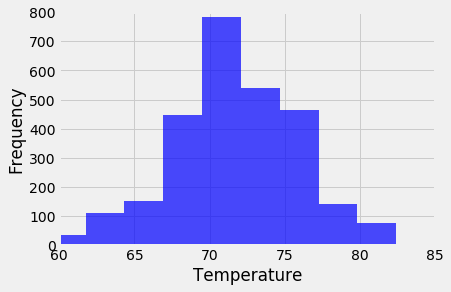

In [209]:
#Visualize
n, bins, patches = plt.hist(temp, 12, facecolor='b', alpha=.70)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.xlim(60, 85)
plt.ylim(0, 800)
plt.show()

In [210]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [211]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates. ??? Confusing
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


In [220]:
session.query(Measurement.date, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.group_by(Measurement.date).filter(Measurement.date >= '2016-01-01').filter(Measurement.date <= '2017-01-01').all()




[('2016-01-01', 62.0, 74.0, 68.16666666666667),
 ('2016-01-02', 69.0, 73.0, 71.83333333333333),
 ('2016-01-03', 63.0, 75.0, 68.5),
 ('2016-01-04', 62.0, 76.0, 69.5),
 ('2016-01-05', 68.0, 75.0, 70.66666666666667),
 ('2016-01-06', 68.0, 74.0, 71.33333333333333),
 ('2016-01-07', 64.0, 76.0, 69.5),
 ('2016-01-08', 65.0, 75.0, 69.83333333333333),
 ('2016-01-09', 70.0, 78.0, 74.16666666666667),
 ('2016-01-10', 64.0, 74.0, 69.4),
 ('2016-01-11', 65.0, 73.0, 69.16666666666667),
 ('2016-01-12', 64.0, 75.0, 68.66666666666667),
 ('2016-01-13', 63.0, 77.0, 68.0),
 ('2016-01-14', 62.0, 75.0, 66.5),
 ('2016-01-15', 67.0, 74.0, 70.33333333333333),
 ('2016-01-16', 65.0, 75.0, 70.8),
 ('2016-01-17', 64.0, 76.0, 68.83333333333333),
 ('2016-01-18', 62.0, 76.0, 67.16666666666667),
 ('2016-01-19', 61.0, 73.0, 66.6),
 ('2016-01-20', 62.0, 77.0, 68.0),
 ('2016-01-21', 65.0, 75.0, 70.5),
 ('2016-01-22', 65.0, 75.0, 69.66666666666667),
 ('2016-01-23', 70.0, 77.0, 72.6),
 ('2016-01-24', 67.0, 78.0, 72.5),
 ('2